In [1]:
#Installs the setup.py in the current working directory.
pip install .

Processing d:\ds\spaceml\interactive tsne\tsne
  Created wheel for InteractivePlot: filename=InteractivePlot-0.1.0-py3-none-any.whl size=9057 sha256=29882c46bb7c0f4bcdf2c537dd567a50fd2f1b17ef2722523007a41c830922e3
  Stored in directory: C:\Users\tarun\AppData\Local\Temp\pip-ephem-wheel-cache-6dtbvo1f\wheels\04\08\45\49a6495f65846849eb614fa274da20054db7415566ebc7a9f1
Successfully built InteractivePlot
Note: you may need to restart the kernel to use updated packages.


# Interactive TSNE/UMAP Plot

In [1]:
import InteractivePlot

In [2]:
from InteractivePlot import PrepareData
model = '../uc_merced.pt'
data_path = '../UCMerced_LandUse/Images'

In [12]:
data = PrepareData(model= model, DATA_PATH = data_path, output_size = 21, num_clusters = 21, method= 'umap')

  0%|                                                                                           | 0/33 [00:00<?, ?it/s]

Using CUDA


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:06<00:00,  4.76it/s]


UMAP(dens_frac=0.0, dens_lambda=0.0, n_jobs=4, n_neighbors=5, random_state=42,
     verbose=1)
Construct fuzzy simplicial set
Fri Mar 26 06:54:44 2021 Finding Nearest Neighbors
Fri Mar 26 06:54:44 2021 Finished Nearest Neighbor Search
Fri Mar 26 06:54:44 2021 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Fri Mar 26 06:54:48 2021 Finished embedding
UMAP done! Time elapsed: 5.6106276512146 seconds
Linkage variables created.
Filename mapping done.


In [13]:
from InteractivePlot import InteractiveAllclose

<IPython.core.display.Javascript object>


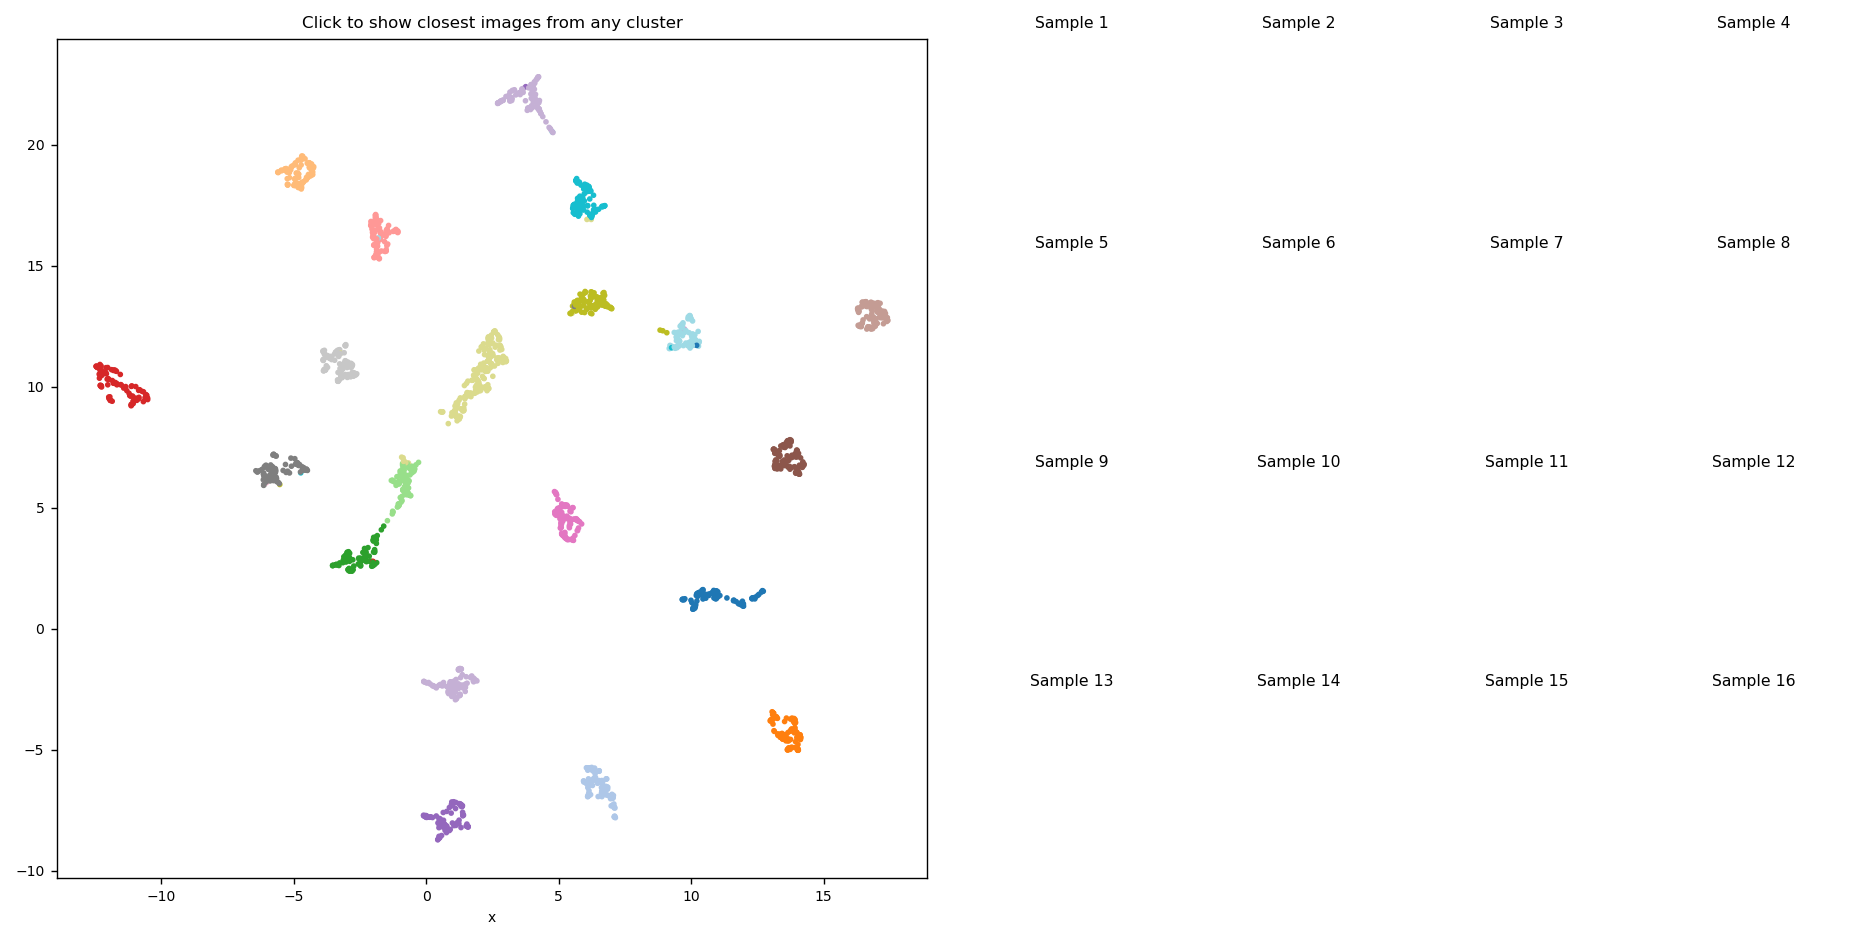

In [14]:
%matplotlib notebook
p = InteractiveAllclose(data.cl, data.tsne_obj, data.objects, data.spd)

## TensorBoard Projector

In [15]:
import torchvision.models as models

resnet18 = models.resnet18(pretrained=True)
resnet18.cuda()
resnet18.eval() # Setup for inferencing

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [16]:
from InteractivePlot import Projector

In [8]:
proj = Projector(model = resnet18, EXPT_NAME = 'projector_test', LOG_PATH = '.')

In [9]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
import torch
import shutil

tfs = transforms.Compose([transforms.Resize((32,32)), 
                          transforms.ToTensor()
#                           transforms.Normalize(mean=[0.485], std=[0.229])
                         ])

# MNIST_data = FashionMNIST(root = r'./FMNIST', download=True, transform=tfs)
dataset = ImageFolder(root = '../UCMerced_LandUse/Images/', transform= tfs)

data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size= 256,
                                          shuffle=True)

batch_img, batch_labels = next(iter(data_loader))

In [10]:
proj.write_embeddings(batch_img)

True

In [11]:
proj.create_tensorboard_log()

torch.Size([256, 1000])
torch.Size([256, 3, 32, 32])
TensorBoard prepared. 
 Open a new console and start TensorBoard with the logdir  .\projector_test\TB\projector_test
